In [1]:
library(tidyverse)
library(laGP)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
eps <- sqrt(.Machine$double.eps)
eps

[1] 1.490116e-08

In [3]:
set.seed(1)
n <- 10
b0 <- 1
b1 <- 0.5
df <- data.frame(nx = seq(1, 10, length.out = n)) %>% 
  mutate(ny = b0 + b1 * nx + rnorm(n, sd = b1))
df

nx,ny
<dbl>,<dbl>
1,1.186773
2,2.091822
3,2.082186
4,3.797640
5,3.664754
6,3.589766
7,4.743715
8,5.369162
9,5.787891


`geom_smooth()` using formula 'y ~ x'



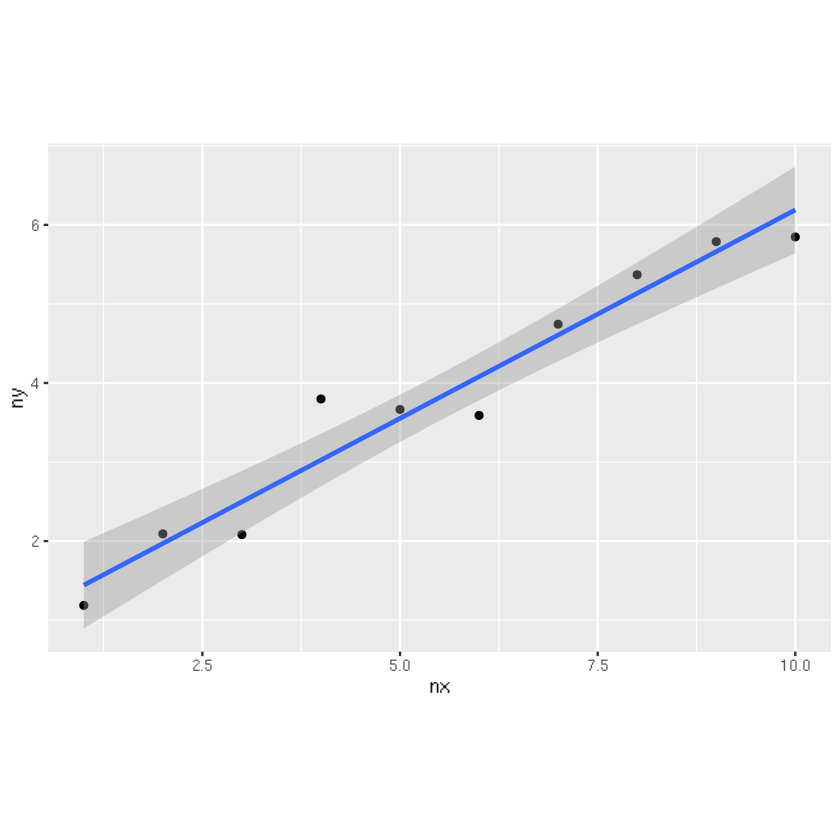

In [4]:
df %>% 
  ggplot(aes(nx, ny)) +
  geom_point() +
  geom_smooth(method = "lm") +
  coord_equal()

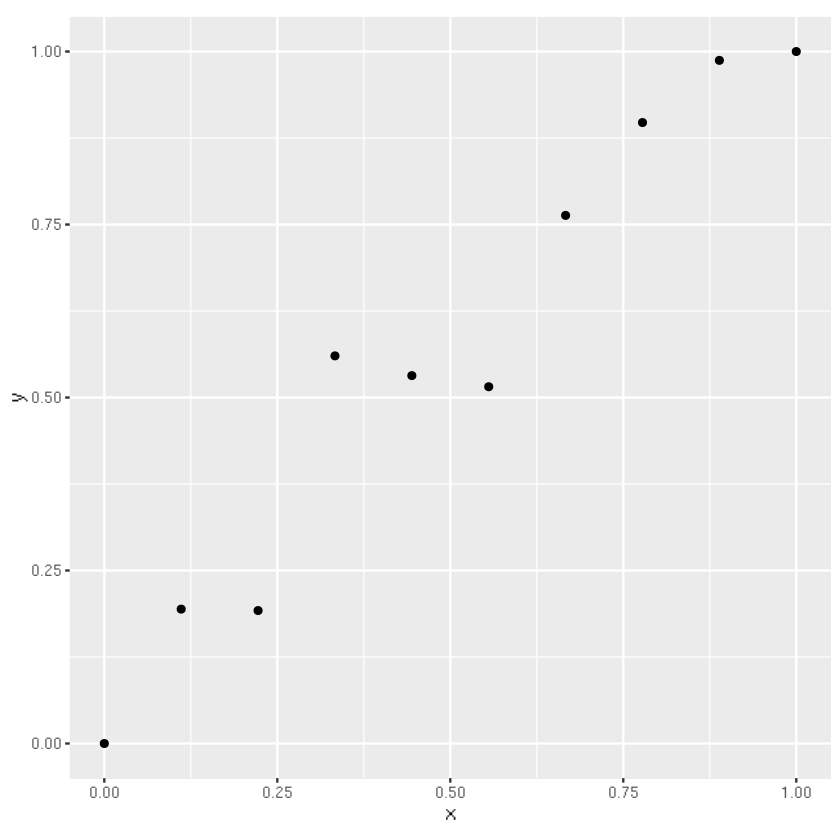

In [6]:
df1 <-
  df %>% 
  mutate(
    x = (nx - min(nx)) / (max(nx) - min(nx)),
    y = (ny - min(ny)) / (max(ny) - min(ny)),
  )

df1 %>% 
  ggplot(aes(x, y)) +
  geom_point() +
#  geom_line() +
  coord_equal()

In [7]:
gpi <- newGP(matrix(df1$x, ncol=1), df1$y, 
             d = 0.1, g = eps, dK = TRUE)
m <- mleGP(gpi, tmax = 1000000000)
m
p <- predGP(gpi, matrix(df1$x, ncol=1), lite=TRUE)
p

$d
[1] 872153.7

$its
[1] 39

$mean
 [1] 0.05819564 0.17063443 0.28307312 0.39551175 0.50795027 0.62038869
 [7] 0.73282699 0.84526517 0.95770320 1.07014110

$s2
 [1] 0.011799922 0.005748475 0.013738389 0.013585928 0.011046394 0.008212663
 [7] 0.013979246 0.011499050 0.014166117 0.016225246

$df
[1] 10

$llik
[1] 4.290594

In [8]:
df1$mean = p$mean
df1$s2 = p$s2
df1

nx,ny,x,y,mean,s2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.186773,0.0000000,0.0000000,0.05819564,0.011799922
2,2.091822,0.1111111,0.1941942,0.17063443,0.005748475
3,2.082186,0.2222222,0.1921267,0.28307312,0.013738389
4,3.797640,0.3333333,0.5602079,0.39551175,0.013585928
5,3.664754,0.4444444,0.5316948,0.50795027,0.011046394
6,3.589766,0.5555556,0.5156047,0.62038869,0.008212663
7,4.743715,0.6666667,0.7632049,0.73282699,0.013979246
8,5.369162,0.7777778,0.8974058,0.84526517,0.011499050
9,5.787891,0.8888889,0.9872514,0.95770320,0.014166117


`geom_smooth()` using formula 'y ~ x'



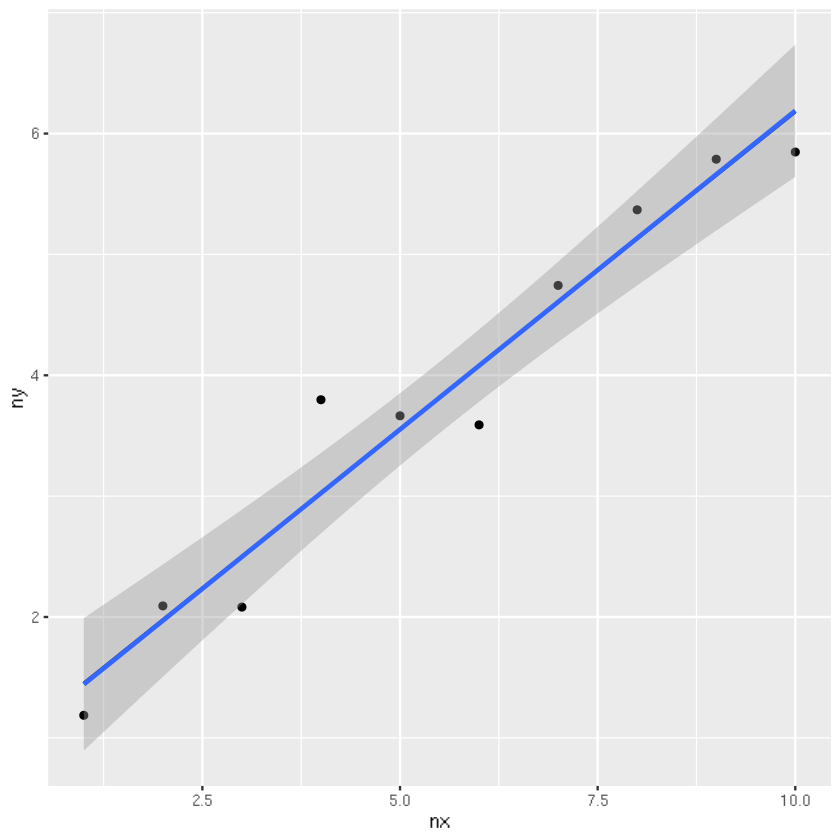

In [9]:
df1 %>% 
  mutate(np = (max(ny) - min(ny)) * mean + min(ny)) %>% 
  ggplot(aes(nx, ny)) + 
  geom_point() +
  geom_line(aes(y = np)) +
  geom_smooth(method = "lm")
  #coord_equal()

In [10]:
lm_fit <- lm(y ~ x, data = select(df1, x, y))
summary(lm_fit)


Call:
lm(formula = y ~ x, data = select(df1, x, y))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10514 -0.06877  0.02509  0.02874  0.16577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05497    0.05102   1.077    0.313    
x            1.01840    0.08601  11.841 2.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0868 on 8 degrees of freedom
Multiple R-squared:  0.946,	Adjusted R-squared:  0.9393 
F-statistic: 140.2 on 1 and 8 DF,  p-value: 2.373e-06


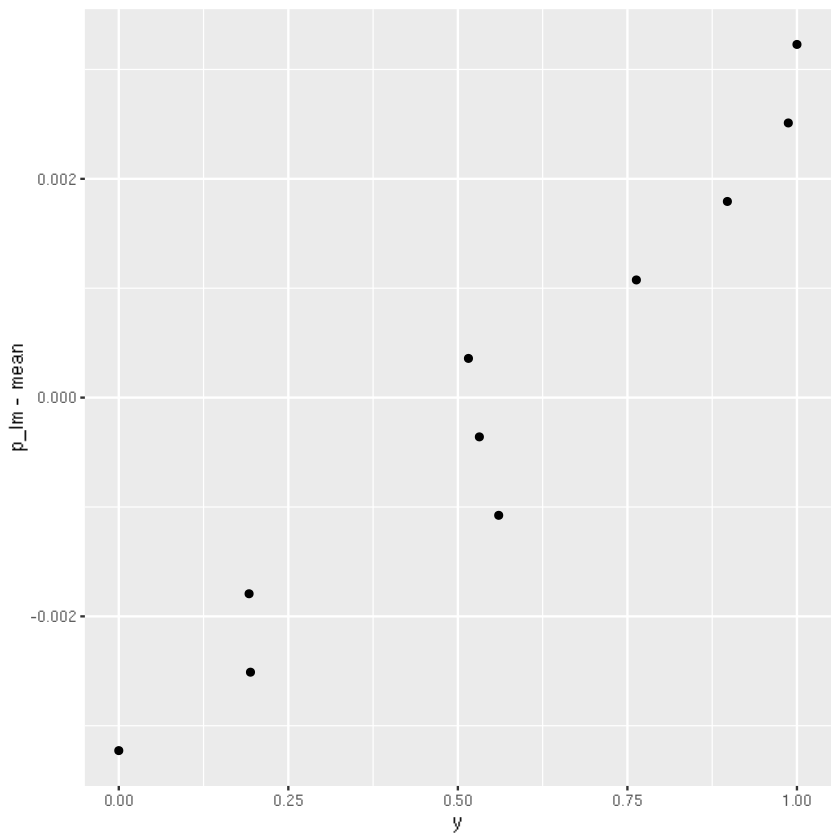

In [11]:
df1 %>% 
  mutate(p_lm = predict(lm_fit)) %>% 
  ggplot(aes(y, p_lm - mean)) +
  geom_point()

In [12]:
test <- tibble(x = seq(0, 2, length.out = 100))
test$lm = predict(lm_fit, newdata = test)
test

x,lm
<dbl>,<dbl>
0.00000000,0.05496821
0.02020202,0.07554198
0.04040404,0.09611576
0.06060606,0.11668953
0.08080808,0.13726330
0.10101010,0.15783707
0.12121212,0.17841084
0.14141414,0.19898461
0.16161616,0.21955838


In [13]:
test %>% 
  mutate(
    ql = qnorm(0.05, sd = sqrt(gps2)),
    qu = qnorm(0.95, sd = sqrt(gps2)),
  ) %>% 
  ggplot(aes(x = x)) +
  geom_line(aes(y = lm)) +
  geom_line(aes(y = gpm), color = "red") +
  geom_linerange(aes(x = x, ymin = gpm + ql, ymax = gpm + qu))

ERROR: Error: Problem with `mutate()` input `ql`.
[31m✖[39m object 'gps2' not found
[34mℹ[39m Input `ql` is `qnorm(0.05, sd = sqrt(gps2))`.


In [14]:
predict(lm_fit, newdata = data.frame(x = 1:20))

1         2         3         4         5         6         7         8 
 1.073370  2.091772  3.110173  4.128575  5.146977  6.165378  7.183780  8.202182 
        9        10        11        12        13        14        15        16 
 9.220583 10.238985 11.257387 12.275788 13.294190 14.312592 15.330993 16.349395 
       17        18        19        20 
17.367797 18.386198 19.404600 20.423002

In [15]:
df1

nx,ny,x,y,mean,s2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.186773,0.0000000,0.0000000,0.05819564,0.011799922
2,2.091822,0.1111111,0.1941942,0.17063443,0.005748475
3,2.082186,0.2222222,0.1921267,0.28307312,0.013738389
4,3.797640,0.3333333,0.5602079,0.39551175,0.013585928
5,3.664754,0.4444444,0.5316948,0.50795027,0.011046394
6,3.589766,0.5555556,0.5156047,0.62038869,0.008212663
7,4.743715,0.6666667,0.7632049,0.73282699,0.013979246
8,5.369162,0.7777778,0.8974058,0.84526517,0.011499050
9,5.787891,0.8888889,0.9872514,0.95770320,0.014166117


d,g,tot.its,dits,gits
<dbl>,<dbl>,<int>,<int>,<int>
0.8967258,0.02108801,27,15,12


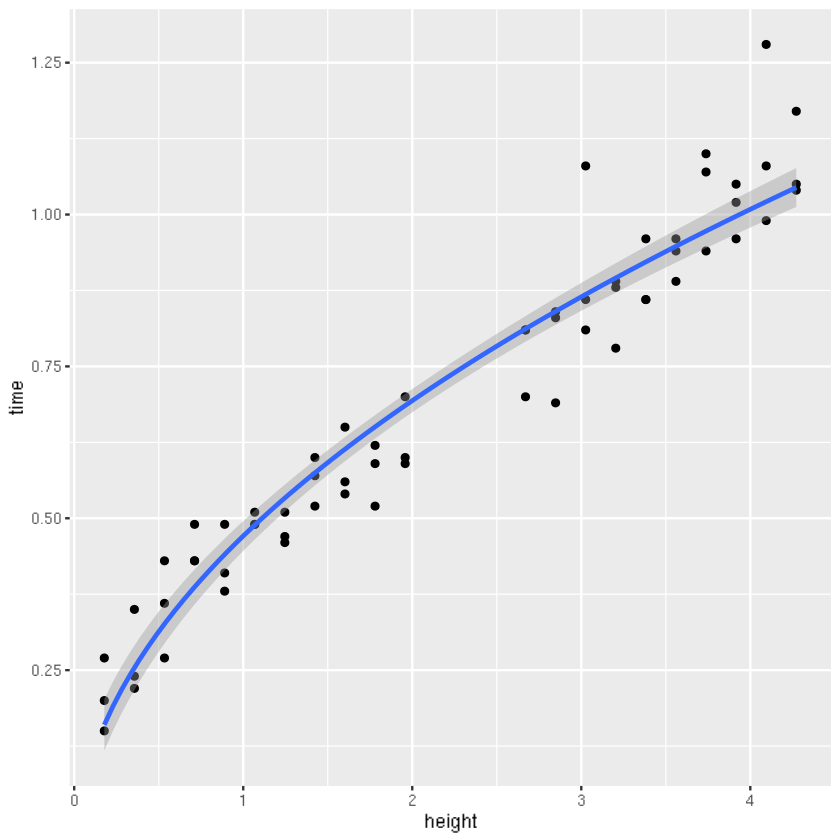

d,g,tot.its,dits,gits
<dbl>,<dbl>,<int>,<int>,<int>
0.8967258,0.02108801,27,15,12


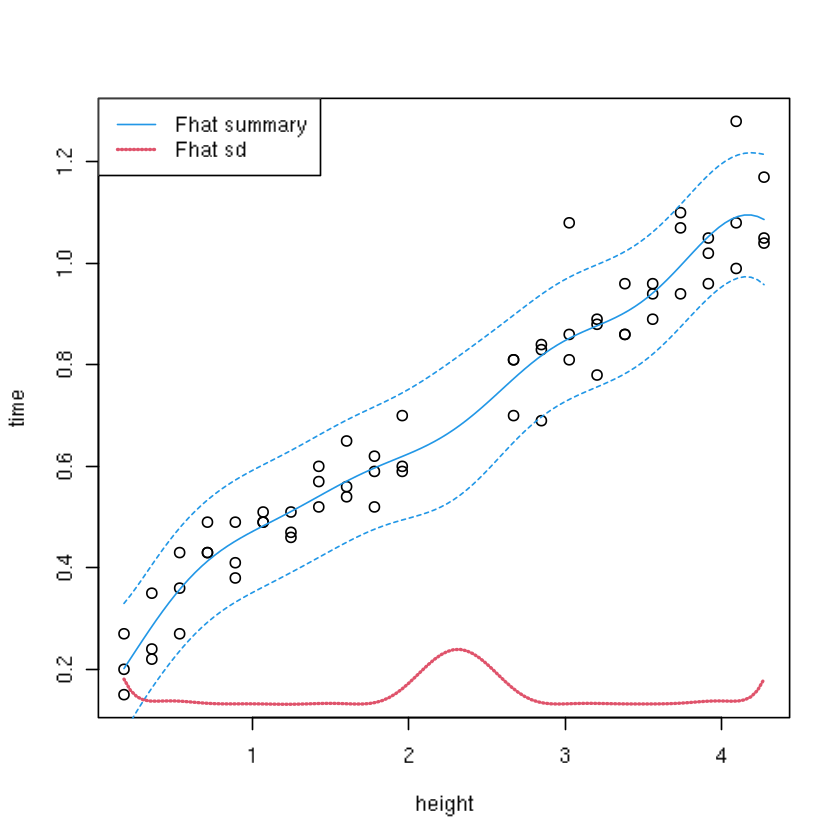

In [16]:
ball <- read.csv("/root/data/ball.csv")

dfb <- tibble(ball)
dfb %>% 
  ggplot(aes(height, time)) +
  geom_point() +
  #geom_smooth(method = "lm", formula = "y ~ poly(x, 2)") +
  geom_smooth(method = "lm", formula = "y ~ sqrt(x)")

field.fit <- newGP(as.matrix(ball$height), ball$time, d=0.1,
                  g=var(ball$time)/10, dK=TRUE)
                  #g=1e-6, dK=TRUE)
eps <- sqrt(.Machine$double.eps)
mle <- jmleGP(field.fit, drange=c(eps, 10), grange=c(eps, var(ball$time)),
              dab=c(3/2, 8))
              #gab=c(3/2, 6))
mle
hr <- range(ball$height)
hs <- seq(0, 1, length=100)
heights <- hs*diff(hr) + hr[1]
p <- predGP(field.fit, as.matrix(heights), lite=TRUE)
deleteGP(field.fit)

plot(ball, xlab="height", ylab="time")
lines(heights, p$mean, col=4)
lines(heights, qnorm(0.05, p$mean, sqrt(p$s2)), lty=2, col=4)
lines(heights, qnorm(0.95, p$mean, sqrt(p$s2)), lty=2, col=4)
lines(heights, 10*sqrt(p$s2)-0.6, col=2, lty=3, lwd=2)
legend("topleft", c("Fhat summary", "Fhat sd"), lty=c(1,3),
  col=c(4,2), lwd=1:2)
mle